In [553]:
from keras.layers.core import Activation, Dropout, Dense
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from nltk.corpus import stopwords
from keras.layers import Flatten
import matplotlib.pyplot as plt
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd
import numpy as np
import re
import nltk



#  Gather Data
### Kaggle - imdb reviews organised in panda dataframe

In [518]:
imdb_reviews = pd.read_csv("/Users/student/Desktop/IMDB_Dataset.csv")

In [519]:
imdb_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [520]:
imdb_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

# Preprocessing

In [521]:
# Check for any null rows
imdb_reviews.isnull().values.any()

False

In [522]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

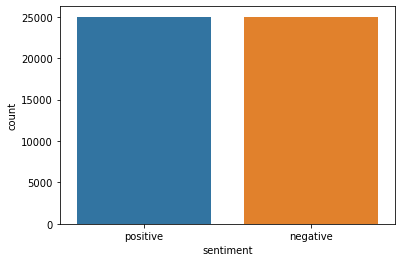

In [523]:
sns.countplot(x='sentiment', data=imdb_reviews)

In [526]:
def preprocessing(sentence):
    
   # The following are being removed from sentences:
   # html tags
    sentence = remove_tags(sen)

    # Numbers & Punctutaions 
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Too many spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [527]:
RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return RE.sub('', text)

In [528]:
X = []
sentences = list(imdb_reviews['review'])
for sen in sentences:
    X.append(preprocessing(sen))

In [529]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [530]:
y = imdb_reviews['sentiment']

# Replacing positive and negative with 1's and 0's
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [532]:
(len(X_train), len(X_test), y_train.shape, y_test.shape)

(40000, 10000, (40000,), (10000,))

In [533]:
# Each word in the corpus is assigned an index uniquely at a maximum of 5,000 words

tokenise = Tokenizer(num_words=5000)
tokenise.fit_on_texts(X_train)

X_train = tokenise.texts_to_sequences(X_train)
X_test = tokenise.texts_to_sequences(X_test)

### Vocabulary size and padding

In [534]:
# Adding 1 to account for python indexing
vocab_size = len(tokenise.word_index) + 1
Max = 100

# Adding padding for standardising length of list 
X_train = pad_sequences(X_train, padding='post', maxlen=Max)
X_test = pad_sequences(X_test, padding='post', maxlen=Max)

### Creating our feature matrix

In [535]:
embeddings_dictionary = dict()
glove_file = open('/Users/student/Desktop/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [556]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenise.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [557]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=Max , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [558]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 100)          9254700   
_________________________________________________________________
flatten_22 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 10001     
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [559]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 2s 62us/step - loss: 0.6018 - acc: 0.6720 - val_loss: 0.5370 - val_acc: 0.7320
Epoch 2/6
32000/32000 [==============================] - 1s 34us/step - loss: 0.4942 - acc: 0.7655 - val_loss: 0.5210 - val_acc: 0.7386
Epoch 3/6
32000/32000 [==============================] - 1s 34us/step - loss: 0.4608 - acc: 0.7835 - val_loss: 0.5200 - val_acc: 0.7449
Epoch 4/6
32000/32000 [==============================] - 1s 34us/step - loss: 0.4348 - acc: 0.8004 - val_loss: 0.5197 - val_acc: 0.7446
Epoch 5/6
32000/32000 [==============================] - 1s 43us/step - loss: 0.4191 - acc: 0.8076 - val_loss: 0.5357 - val_acc: 0.7394
Epoch 6/6
32000/32000 [==============================] - 1s 34us/step - loss: 0.4126 - acc: 0.8130 - val_loss: 0.5394 - val_acc: 0.7424


In [560]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 51us/step


In [561]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5410311362266541
Test Accuracy: 0.7415000200271606


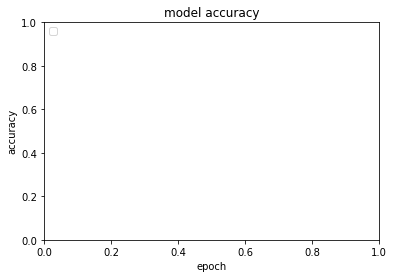

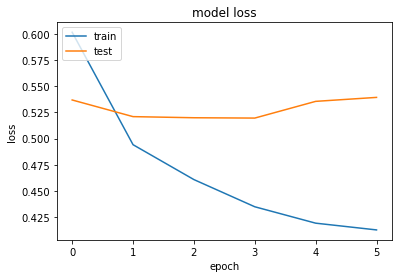

In [562]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [563]:
instance = X[57]

In [564]:
instance

'I laughed all the way through this rotten movie It so unbelievable woman leaves her husband after many years of marriage has breakdown in front of real estate office What happens The office manager comes outside and offers her job Hilarious Next thing you know the two women are going at it Yep they re lesbians Nothing rings true in this Lifetime for Women with nothing better to do movie Clunky dialogue like don want to spend the rest of my life feeling like had chance to be happy and didn take it doesn help There a wealthy distant mother who disapproves of her daughter new relationship sassy black maid unbelievable that in the year film gets made in which there a sassy black maid Hattie McDaniel must be turning in her grave The woman has husband who freaks out and wants custody of the snotty teenage kids Sheesh No cliche is left unturned '

In [517]:
def Sentimental_analysis(sentence):
    instance = tokenise.texts_to_sequences(sentence)

    flat_list = []
    for sublist in instance:
        for item in sublist:
            flat_list.append(item)

    flat_list = [flat_list]
    instance = pad_sequences(flat_list, padding='post', maxlen=Max)
    probability = model.predict(instance)[0][0]

    if  probability < 0.5:
        result = 'Negative review'
    else:
        result = 'Positive review'
    
    return result

In [547]:
Sentimental_analysis(instance)

'Positive review'